In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [59]:
url= "titanic.csv"
titanic = pd.read_csv(url)

In [60]:
titanic.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


#### Data Summary

In [61]:
print(titanic.shape)
titanic.describe()

(891, 12)


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


#### we wil be dropping some columns as they will not be used in building the model

In [62]:
titanic.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis=1, inplace=True)

In [63]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


#### Lets check out for missing values

In [64]:
titanic.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [65]:
modal_age = titanic['Age'].mode()[0]

In [66]:
#lets replace the missing values in the age column with the mean Age
titanic['Age'] = titanic['Age'].fillna(modal_age)

In [67]:
# lets confirm the missing values have all been replaced
titanic.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

In [68]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [69]:
titanic['Age']= titanic['Age'].astype(int)


In [70]:
titanic.Fare.min()

# we can assume its possible that some persons were not charged for the trip, some might include the workers on board

0.0

In [71]:
# let convert our Sex column into numerical data before training thye model
genders = {"male": 0, "female": 1}

for data in titanic['Sex']:
    c = titanic['Sex'].map(genders)


In [72]:
titanic['Sex'] =c

In [73]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,0,22,1,0,7.2500,0
1,1,1,38,1,0,71.2833,1
2,3,1,26,0,0,7.9250,1
3,1,1,35,1,0,53.1000,1
4,3,0,35,0,0,8.0500,0


### Data Modeling1

In [76]:
X = titanic.drop('Survived', axis=1)
y= titanic['Survived'] 

In [77]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state= 42)

In [78]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [79]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [81]:
classifier.score(x_train,y_train)

0.9805389221556886

In [82]:
y_pred = classifier.predict(x_test)

In [83]:
classifier.score(x_test,y_test)

0.7399103139013453

#### the model shows high variance as it performs well on the train data, but fairly well on the tesy data

In [86]:
# lets standardize our data and do some hyper parameter tunning
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [90]:
x_scaled = scaler.fit_transform(X)

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state= 42)

In [92]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [93]:
classifier.score(x_train,y_train)

0.9805389221556886

In [94]:
y_pred = classifier.predict(x_test)

In [95]:
classifier.score(x_test, y_test)

0.7623318385650224

the standardization improved our model score to about 76%

still we'll carry out hyperparameter tunning to see if the model score can further be improved

we will introduce Gridsearch Cross Validation technique

In [97]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,40,1),
    'min_samples_leaf' : range(1,15,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [99]:
grid_search = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [100]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [101]:
best_parameters = grid_search.best_params_
print('the best parameter is {}'.format(best_parameters))

the best parameter is {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 7, 'min_samples_split': 7, 'splitter': 'random'}


In [102]:
grid_search.best_score_

0.8338570306362921

In [104]:
classifier = DecisionTreeClassifier(criterion= 'gini', max_depth= 12, min_samples_leaf= 7, min_samples_split= 7, splitter= 'random')

In [105]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=7, min_samples_split=7,
                       splitter='random')

In [108]:
y_pred= classifier.predict(x_test)

In [109]:
classifier.score(x_test, y_test)

0.7982062780269058

### Model Evaluation

In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,118,16,134
1,29,60,89
All,147,76,223


Text(0.5, 15.0, 'Predicted label')

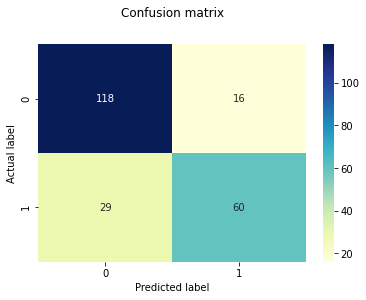

In [113]:
# Creating a Heatmap for the confusion matrix. 
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [116]:
cm =confusion_matrix(y_test,y_pred)
true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]

In [117]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7982062780269058

In [118]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8805970149253731

In [119]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8027210884353742

In [120]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8398576512455515

In [123]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7773771591480797

### Conclusion

We can say that the Model did a good job in predicting the survival of persond on board yhe titanic ship